In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from pathlib import Path
import sys
parent_path = str(Path().joinpath('..\..\..\..').resolve())
sys.path.append(parent_path)

In [3]:
from triple_agent.parsing.replay.get_parsed_replays import get_parsed_replays
from triple_agent.constants.events import select_sc19
from triple_agent.reports.specific.character_selection import (spy_selection,
                                                      st_selection,
                                                      amba_selection,
                                                      double_agent_selection,
                                                      determine_character_in_role)
from triple_agent.reports.specific.game_outcomes import game_outcomes
from triple_agent.classes.roles import Roles
from triple_agent.classes.outcomes import WinType
from triple_agent.classes.missions import Missions, MissionStatus
from triple_agent.reports.generation.common_sort_functions import sort_by_spy_wins, sort_by_sniper_wins
from triple_agent.reports.generation.plot_specs import AxisProperties, DataQueryProperties, PlotLabelStyle
from triple_agent.reports.specific.action_tests import action_test_percentages, diff_action_test_percentages
from triple_agent.reports.specific.mission_choices import mission_choices
from triple_agent.reports.specific.mission_completes import mission_completion_query, mission_completion, _mission_completes_details
from triple_agent.classes.action_tests import ActionTest
from collections import Counter, defaultdict

In [4]:
replays = get_parsed_replays(select_sc19)

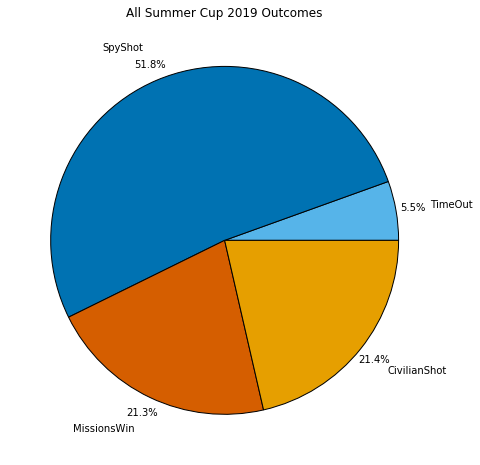

,WinType.TimeOut,WinType.SpyShot,WinType.MissionsWin,WinType.CivilianShot
NaN,57,537,221,222


In [5]:
game_outcomes(
    replays,
    axis_properties=AxisProperties(title="All Summer Cup 2019 Outcomes")
).frame

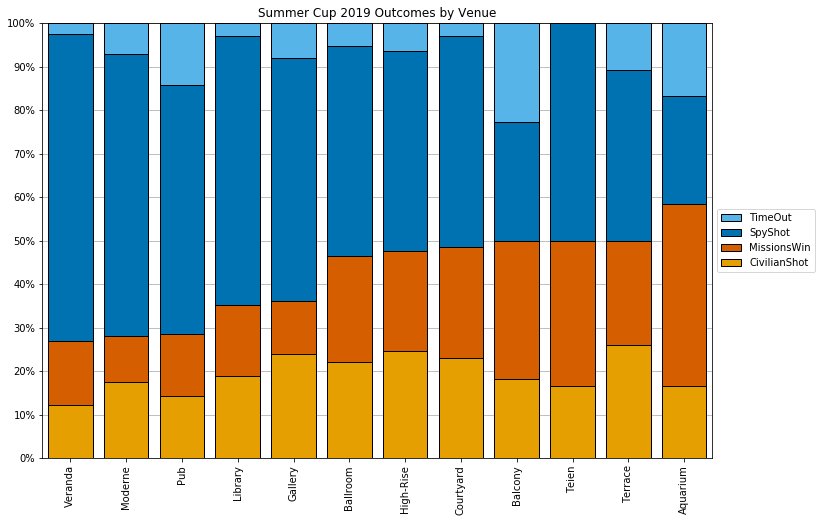

,Venue.Veranda,Venue.Moderne,Venue.Pub,Venue.Library,Venue.Gallery,Venue.Ballroom,Venue.HighRise,Venue.Courtyard,Venue.Balcony,Venue.Teien,Venue.Terrace,Venue.Aquarium
WinType.TimeOut,0.024390,0.070175,0.142857,0.029703,0.08,0.051546,0.064171,0.030,0.227273,0.000000,0.108696,0.166667
WinType.SpyShot,0.707317,0.649123,0.571429,0.618812,0.56,0.484536,0.459893,0.485,0.272727,0.500000,0.391304,0.250000
WinType.MissionsWin,0.146341,0.105263,0.142857,0.163366,0.12,0.242268,0.229947,0.255,0.318182,0.333333,0.239130,0.416667
WinType.CivilianShot,0.121951,0.175439,0.142857,0.188119,0.24,0.221649,0.245989,0.230,0.181818,0.166667,0.260870,0.166667


In [6]:
game_outcomes(
    replays,
    DataQueryProperties(
        groupby=lambda g: g.venue,
        secondary_order=sort_by_spy_wins,
        percent_normalized_data=True),
    axis_properties=AxisProperties(
        title="Summer Cup 2019 Outcomes by Venue"
    )
).frame

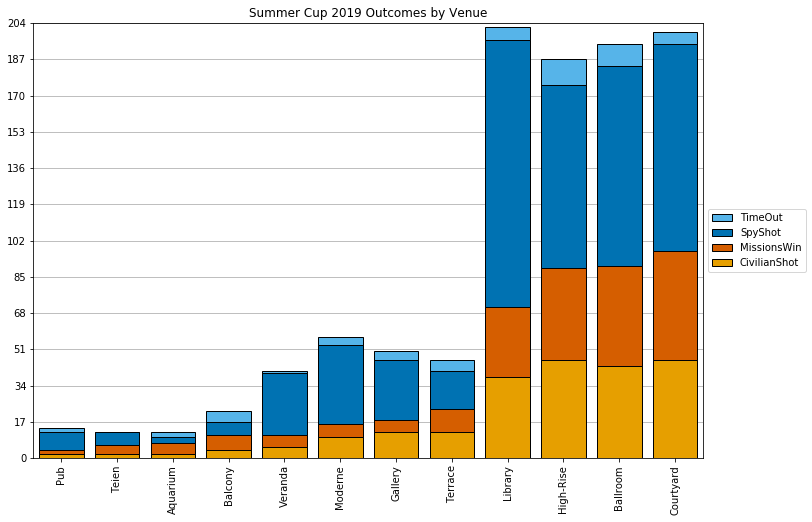

,Venue.Pub,Venue.Teien,Venue.Aquarium,Venue.Balcony,Venue.Veranda,Venue.Moderne,Venue.Gallery,Venue.Terrace,Venue.Library,Venue.HighRise,Venue.Ballroom,Venue.Courtyard
WinType.TimeOut,2,0,2,5,1,4,4,5,6,12,10,6
WinType.SpyShot,8,6,3,6,29,37,28,18,125,86,94,97
WinType.MissionsWin,2,4,5,7,6,6,6,11,33,43,47,51
WinType.CivilianShot,2,2,2,4,5,10,12,12,38,46,43,46


In [7]:
game_outcomes(
    replays,
    DataQueryProperties(
        groupby=lambda g: g.venue,
        secondary_order=sort_by_spy_wins,
    ),
    axis_properties=AxisProperties(
        title="Summer Cup 2019 Outcomes by Venue"
    )
).frame

#### *viri: How often spies were each guest.*

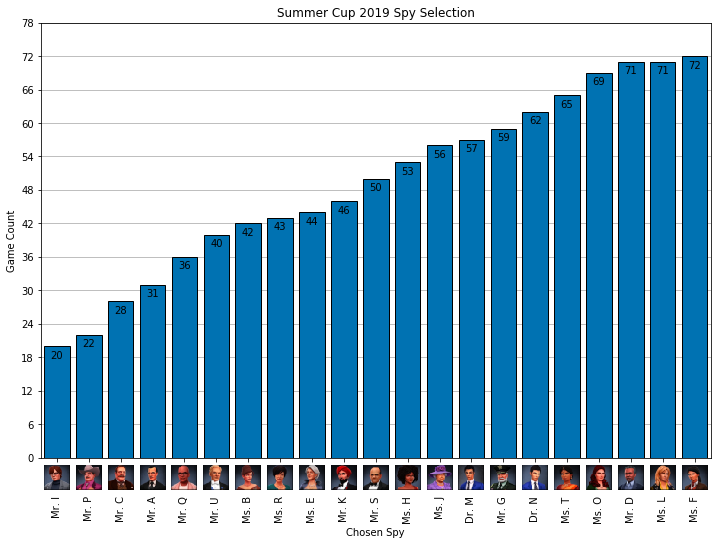

In [8]:
_ = spy_selection(
    replays,
    axis_properties = AxisProperties(
        title="Summer Cup 2019 Spy Selection",
        x_axis_portrait=True,
        y_axis_label="Game Count",
        x_axis_label="Chosen Spy",
    ),
    data_query = DataQueryProperties(
        primary_order=sum,
    )
)

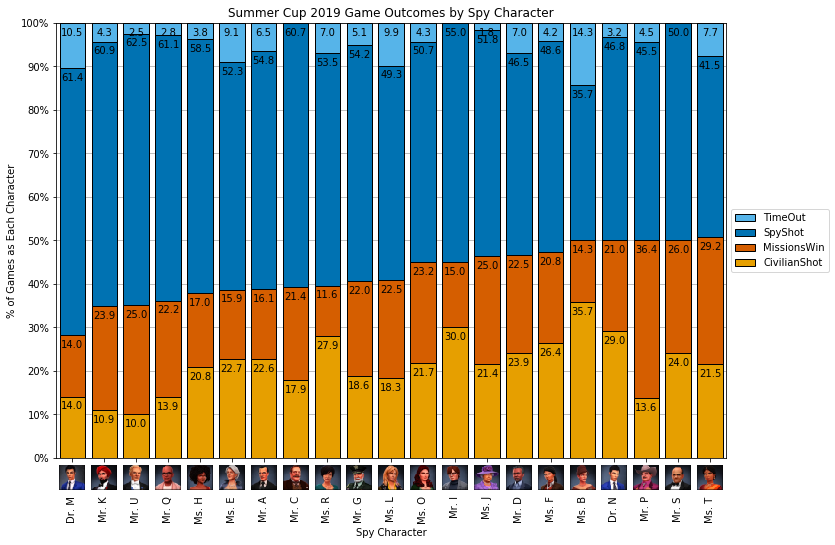

In [9]:
_ = game_outcomes(
    replays,
    axis_properties = AxisProperties(
        title="Summer Cup 2019 Game Outcomes by Spy Character",
        x_axis_portrait=True,
        y_axis_label="% of Games as Each Character",
        x_axis_label="Spy Character",
        data_label_style=PlotLabelStyle.Plain,
    ),
    data_query = DataQueryProperties(
        groupby=lambda g: determine_character_in_role(g, Roles.Spy),
        secondary_order=sort_by_spy_wins,
        percent_normalized_data=True
    )
)

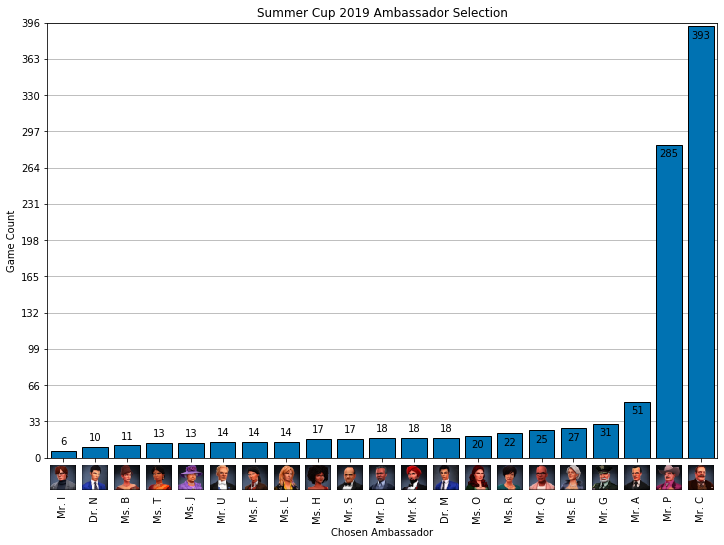

In [10]:
_ = amba_selection(
    replays,
    axis_properties = AxisProperties(
        title="Summer Cup 2019 Ambassador Selection",
        x_axis_portrait=True,
        y_axis_label="Game Count",
        x_axis_label="Chosen Ambassador",
    ),
    data_query = DataQueryProperties(
        primary_order=sum,
    )
)

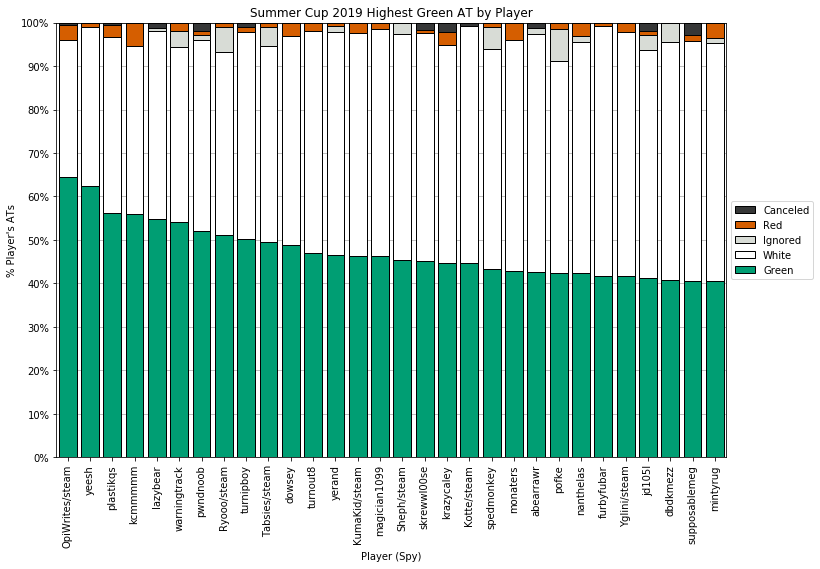

In [11]:
_ = action_test_percentages(
    replays,
    axis_properties = AxisProperties(
        title='Summer Cup 2019 Highest Green AT by Player',
        x_axis_label='Player (Spy)',
        y_axis_label='% Player\'s ATs',
    ),
    data_query = DataQueryProperties(
        groupby=lambda g: g.spy,
        secondary_order=lambda name_series: -name_series[1][ActionTest.Green],
        limit=30,
        reverse_primary_order=True,
        percent_normalized_data=True)    
)

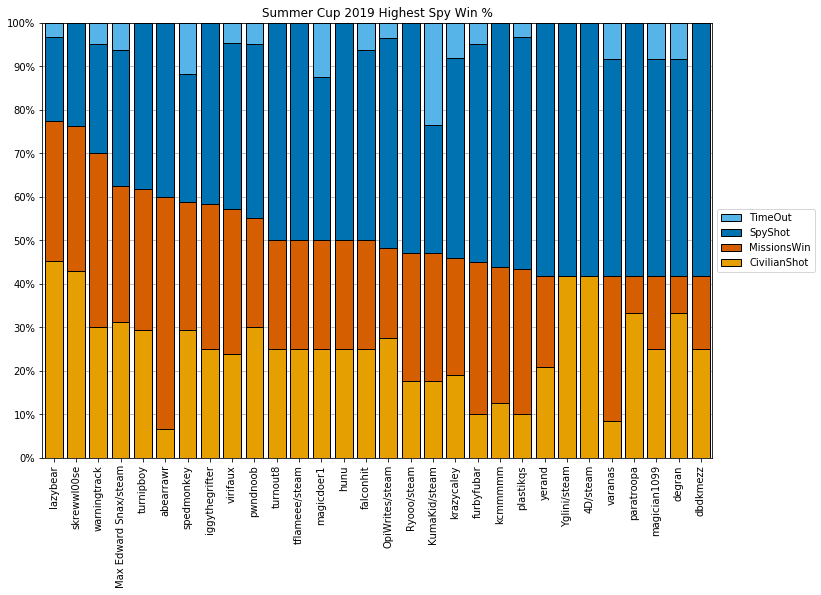

In [12]:
spy_winr = game_outcomes(
    replays,
    DataQueryProperties(
        groupby=lambda g: g.spy,
        secondary_order=sort_by_spy_wins,
        reverse_secondary_order=True,
        limit=30,
        percent_normalized_data=True),
    axis_properties=AxisProperties(title="Summer Cup 2019 Highest Spy Win %")
)

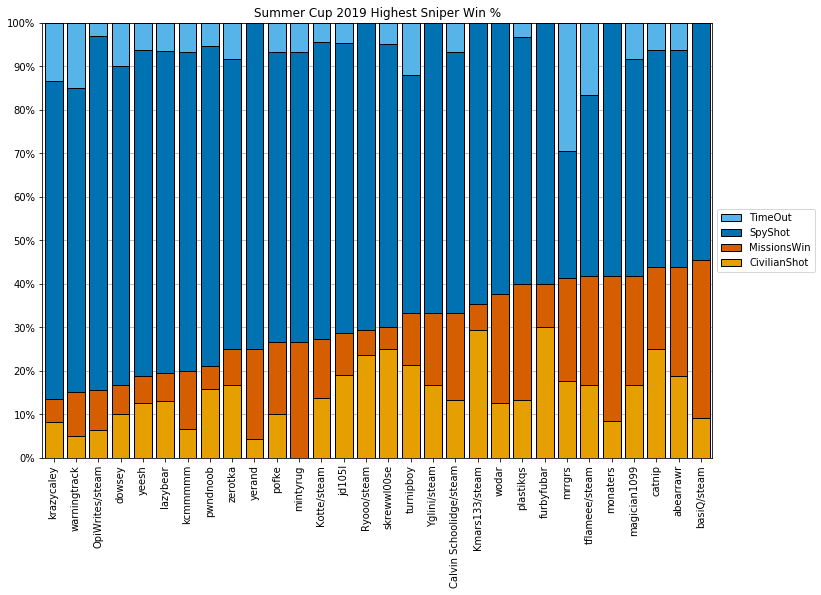

In [13]:
_ = game_outcomes(
    replays,
    DataQueryProperties(
        groupby=lambda g: g.sniper,
        secondary_order=sort_by_sniper_wins,
        reverse_secondary_order=True,
        limit=30,
        percent_normalized_data=True),
    axis_properties=AxisProperties(title="Summer Cup 2019 Highest Sniper Win %")
)

#### *Wodar: Total Spies Shot* : **531**  
#### *Wodar: Total Civilians Shot* : **221**  
#### *Royal_Flu$h: Total Bullets Fired* : **752**

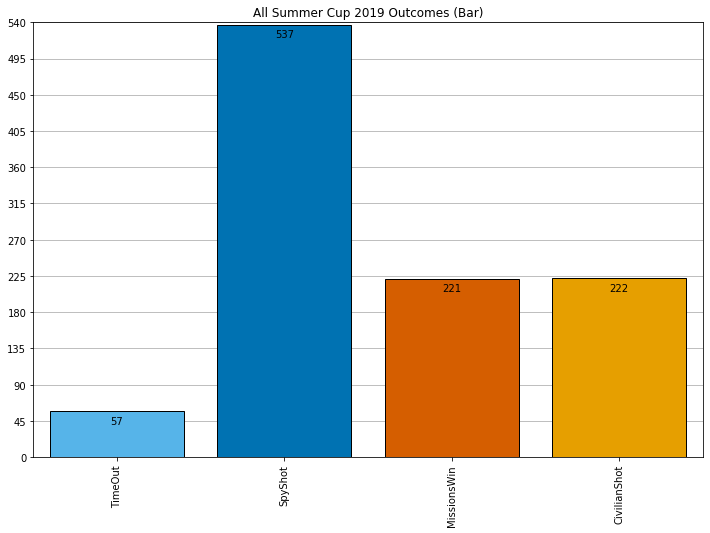

In [14]:
_ = game_outcomes(
    replays,
    axis_properties=AxisProperties(
        title="All Summer Cup 2019 Outcomes (Bar)",
        force_bar=True,
        data_label_style=PlotLabelStyle.Plain,
    )
)

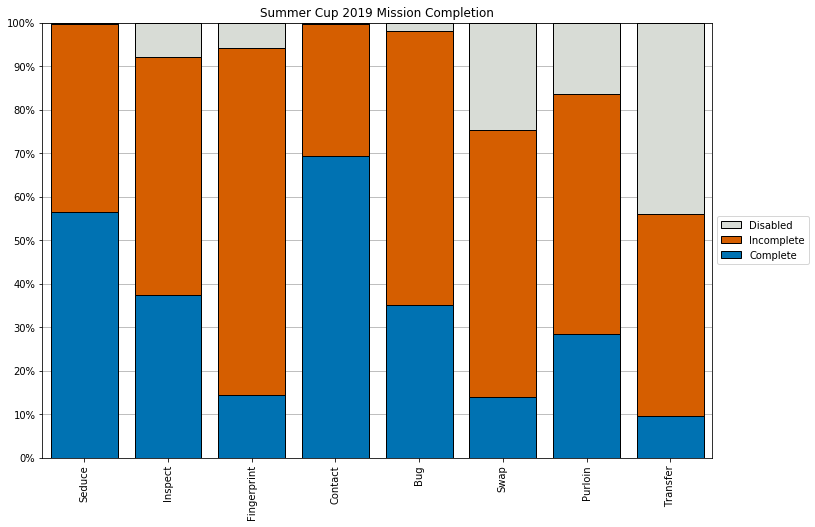

In [15]:
mission_completion(replays, "Summer Cup 2019 Mission Completion")

#### *Wodar: Most completed hard tell over all and in spy winning games*

In [16]:
mission_complete_counts = defaultdict(Counter)
_mission_completes_details(replays, mission_complete_counts)

print("All Game Hard Tell Counts")
print("     Bug: ", mission_complete_counts[Missions.Bug][MissionStatus.Complete])
print("    Swap: ", mission_complete_counts[Missions.Swap][MissionStatus.Complete])
print(" Purloin: ", mission_complete_counts[Missions.Purloin][MissionStatus.Complete])
print("Transfer: ", mission_complete_counts[Missions.Transfer][MissionStatus.Complete])

All Game Hard Tell Counts
     Bug:  363
    Swap:  145
 Purloin:  296
Transfer:  100


In [17]:
mission_complete_counts = defaultdict(Counter)
_mission_completes_details(list(filter(lambda g: g.win_type & WinType.SpyWin, replays)), mission_complete_counts)

print("Spy Wins Hard Tell Counts")
print("     Bug: ", mission_complete_counts[Missions.Bug][MissionStatus.Complete])
print("    Swap: ", mission_complete_counts[Missions.Swap][MissionStatus.Complete])
print(" Purloin: ", mission_complete_counts[Missions.Purloin][MissionStatus.Complete])
print("Transfer: ", mission_complete_counts[Missions.Transfer][MissionStatus.Complete])

Spy Wins Hard Tell Counts
     Bug:  197
    Swap:  69
 Purloin:  112
Transfer:  55
